# Trabajo Práctico Nº1

**Integrantes**:
- Santiago Belen. 

**Parte 1** (imágenes en /white_patch y /coord_cromaticas):
- Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
- Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
- Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

**Parte 2**:
- Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas. 
- Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
- Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

## Parte 1
### A) Coordenadas cromaticas

In [1]:
from PIL import Image
import numpy as np
import os
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import cv2

In [2]:
# Función para calcular las coordenadas cromáticas
def convertir_a_coordenadas_cromaticas(rgb_array):
    suma_rgb = np.sum(rgb_array, axis=1, keepdims=True)
    suma_rgb[suma_rgb == 0] = 1 
    x = rgb_array[:, 0] / suma_rgb[:, 0]  
    y = rgb_array[:, 1] / suma_rgb[:, 0]  
    z = 1.0 - x - y                     
    z = np.where(z < 0, 0, z)            
    return np.stack((x, y, z), axis=1)  

# Rutas a carpetas
ruta_carpeta_entrada = "./coord_cromaticas/Input"
ruta_carpeta_salida = "./coord_cromaticas/Output"

# Lista para almacenar los resultados del análisis
analisis_datos = []

In [3]:
# Generar la tabla de datos
for file_name in os.listdir(ruta_carpeta_entrada):
    try:
        # Construir la ruta completa del archivo de entrada
        input_image_path = os.path.join(ruta_carpeta_entrada, file_name)
        
        # Abrir la imagen
        imagen = Image.open(input_image_path)
        
        # Analizar el modo original de la imagen
        modo_original = imagen.mode
        canales_originales = len(imagen.getbands()) 
        
        # Si no es RGB, convertir y registrar
        if modo_original != "RGB":
            imagen = imagen.convert("RGB")
            conversion_realizada = True
        else:
            conversion_realizada = False
        
        # Analizar la imagen después de la conversión
        imagen_array = np.array(imagen)
        filas, columnas, _ = imagen_array.shape
        
        # Obtener estadísticas de los canales
        maximos = imagen_array.max(axis=(0, 1))
        minimos = imagen_array.min(axis=(0, 1))
        
        # Almacenar los resultados del análisis
        analisis_datos.append({
            "Archivo": file_name,
            "Modo original": modo_original,
            "Canales originales": canales_originales,
            "Conversión a RGB": "Sí" if conversion_realizada else "No",
            "Modo final": imagen.mode,
            "Canales finales": 3, 
            "Max_R": maximos[0],
            "Min_R": minimos[0],
            "Max_G": maximos[1],
            "Min_G": minimos[1],
            "Max_B": maximos[2],
            "Min_B": minimos[2]
        })
    except Exception as e:
        print(f"Error al procesar la imagen '{file_name}': {e}")

# Crear un DataFrame
df_analisis = pd.DataFrame(analisis_datos)
display(df_analisis)

,Archivo,Modo original,Canales originales,Conversión a RGB,Modo final,Canales finales,Max_R,Min_R,Max_G,Min_G,Max_B,Min_B
0,CoordCrom_1.png,RGBA,4,Sí,RGB,3,255,0,255,0,255,0
1,CoordCrom_2.png,RGBA,4,Sí,RGB,3,195,0,194,0,167,0
2,CoordCrom_3.png,RGBA,4,Sí,RGB,3,130,0,146,0,110,0


Se observa que las 3 imagenes para la prueba de coordenadas cromaticas se encuentran en modo RGBA, por lo que se las convierte a RGB para procesar.

In [4]:
# Procesar las imágenes y generar grafico comparativo
for file_name in os.listdir(ruta_carpeta_entrada):
    try:
        # Construir la ruta completa del archivo de entrada
        input_image_path = os.path.join(ruta_carpeta_entrada, file_name)
        
        # Abrir la imagen
        imagen = Image.open(input_image_path).convert("RGB")
        imagen_array = np.array(imagen)
        filas, columnas, _ = imagen_array.shape
        
        # Convertir a coordenadas cromáticas
        imagen_rgb_reshaped = imagen_array.reshape(-1, 3)
        coordenadas_cromaticas = convertir_a_coordenadas_cromaticas(imagen_rgb_reshaped)
        
        # Escalar de 0-1 a 0-255 y convertir a uint8
        imagen_cromatica = (coordenadas_cromaticas.reshape(filas, columnas, 3) * 255).astype(np.uint8)

        # Crear imagen concatenada (original y modificada)
        imagen_final = Image.fromarray(imagen_cromatica)
        imagen_concatenada = Image.new('RGB', (columnas * 2, filas))
        imagen_concatenada.paste(imagen, (0, 0))
        imagen_concatenada.paste(imagen_final, (columnas, 0))

        # Guardar imagen procesada
        output_image_path = os.path.join(ruta_carpeta_salida, f"{os.path.splitext(file_name)[0]}_comparada.png")
        imagen_concatenada.save(output_image_path)
        print(f"Imagen guardada correctamente en: {output_image_path}")

        # Mostrar imagen en consola
        #plt.figure(figsize=(10, 5))
        #plt.imshow(imagen_concatenada)
        #plt.axis('off')
        #plt.title(f"Imagen procesada: {file_name}")
        #plt.show()

    except Exception as e:
        print(f"Error al procesar la imagen '{file_name}': {e}")

Imagen guardada correctamente en: ./coord_cromaticas/Output\CoordCrom_1_comparada.png
Imagen guardada correctamente en: ./coord_cromaticas/Output\CoordCrom_2_comparada.png
Imagen guardada correctamente en: ./coord_cromaticas/Output\CoordCrom_3_comparada.png


![Coordenadas cromaticas](Analisis/Coordenadas%20cromaticas.png)

Imagenes comparativas del resultado del algoritmo de coordenadas cromaticas. 

### B) White patch

In [5]:
# Rutas a carpetas
ruta_carpeta_entrada_2 = "./white_patch/Input"
ruta_carpeta_salida_2 = "./white_patch/Output"

# Lista para almacenar los resultados del análisis
analisis_datos_2 = []

In [6]:
# Generar la tabla de datos
for file_name in os.listdir(ruta_carpeta_entrada_2):
    try:
        # Construir la ruta completa del archivo de entrada
        input_image_path = os.path.join(ruta_carpeta_entrada_2, file_name)
        
        # Abrir la imagen
        imagen = Image.open(input_image_path)
        
        # Analizar el modo original de la imagen
        modo_original = imagen.mode
        canales_originales = len(imagen.getbands()) 
        
        # Si no es RGB, convertir y registrar
        if modo_original != "RGB":
            imagen = imagen.convert("RGB")
            conversion_realizada = True
        else:
            conversion_realizada = False
        
        # Analizar la imagen después de la conversión
        imagen_array = np.array(imagen)
        filas, columnas, _ = imagen_array.shape
        
        # Obtener estadísticas de los canales
        maximos = imagen_array.max(axis=(0, 1))
        minimos = imagen_array.min(axis=(0, 1))
        
        # Almacenar los resultados del análisis
        analisis_datos_2.append({
            "Archivo": file_name,
            "Modo original": modo_original,
            "Canales originales": canales_originales,
            "Conversión a RGB": "Sí" if conversion_realizada else "No",
            "Modo final": imagen.mode,
            "Canales finales": 3, 
            "Max_R": maximos[0],
            "Min_R": minimos[0],
            "Max_G": maximos[1],
            "Min_G": minimos[1],
            "Max_B": maximos[2],
            "Min_B": minimos[2]
        })
    except Exception as e:
        print(f"Error al procesar la imagen '{file_name}': {e}")

# Crear un DataFrame
df_analisis = pd.DataFrame(analisis_datos_2)
display(df_analisis)

,Archivo,Modo original,Canales originales,Conversión a RGB,Modo final,Canales finales,Max_R,Min_R,Max_G,Min_G,Max_B,Min_B
0,test_blue.png,RGB,3,No,RGB,3,165,0,138,0,200,0
1,test_green.png,RGB,3,No,RGB,3,210,0,250,0,171,0
2,test_red.png,RGB,3,No,RGB,3,247,0,157,0,175,0
3,wp_blue.jpg,RGB,3,No,RGB,3,255,0,255,0,255,10
4,wp_green.png,RGBA,4,Sí,RGB,3,126,0,252,18,155,0
5,wp_green2.jpg,RGB,3,No,RGB,3,170,0,255,15,172,0
6,wp_red.png,RGBA,4,Sí,RGB,3,255,11,134,0,122,0
7,wp_red2.jpg,RGB,3,No,RGB,3,255,0,201,0,203,0


Del analisis inicial se pueden realizar las siguientes afirmaciones:
- 2 imagenes tuvieron que ser convertidas a RGB ya que originalmente se encontraban en RGBA (wp_green.png	y wp_red.png). 
- 2 imagenes presentan formato .jpg (wp_blue.jpg y wp_red2.jpg)  que se caracteriza por ser una compresion con perdida, que podrian afectar negativamente los resultados. 
- Todas las imagenes parecen tener al menos un canal con un valor aproximado a 255 (200 a 255) lo cual es una condicion favorable para el algoritmo. 

In [7]:
# Procesar las imágenes y generar grafico comparativo
for file_name in os.listdir(ruta_carpeta_entrada_2):
    try:
        # Construir la ruta completa del archivo de entrada
        input_image_path = os.path.join(ruta_carpeta_entrada_2, file_name)

        # Abrir la imagen
        test_image = Image.open(input_image_path).convert("RGB")
        
        # Convertir la imagen en un arreglo NumPy para procesamiento
        test_image_array = np.array(test_image)

        # Extraer los canales R, G, B
        R, G, B = test_image_array[:, :, 0], test_image_array[:, :, 1], test_image_array[:, :, 2]

        # Calcular los valores máximos de cada canal
        R_max, G_max, B_max = np.max(R), np.max(G), np.max(B)

        # Aplicar la fórmula
        R_normalized = (255 / R_max) * R if R_max != 0 else R
        G_normalized = (255 / G_max) * G if G_max != 0 else G
        B_normalized = (255 / B_max) * B if B_max != 0 else B

        # Recombinar los canales normalizados
        normalized_test_image_array = np.stack((R_normalized, G_normalized, B_normalized), axis=2).astype(np.uint8)

        # Convertir el arreglo NumPy de nuevo en una imagen
        normalized_test_image = Image.fromarray(normalized_test_image_array)

        # Crear imagen concatenada (original y modificada)
        combined_width = test_image.width + normalized_test_image.width
        combined_height = max(test_image.height, normalized_test_image.height)
        combined_image = Image.new('RGB', (combined_width, combined_height))
        combined_image.paste(test_image, (0, 0))
        combined_image.paste(normalized_test_image, (test_image.width, 0))

        # Guardar imagen procesada
        output_image_path = os.path.join(ruta_carpeta_salida_2, f"combined_white_patch_{file_name}")
        combined_image.save(output_image_path)
        print(f"Imagen combinada guardada en: {output_image_path}")

        # Mostrar la imagen procesada en pantalla con un tamaño más pequeño
        #plt.figure(figsize=(6, 3))  # Reduce el tamaño de la imagen a 6 pulgadas de ancho por 3 pulgadas de alto
        #plt.imshow(combined_image)
        #plt.axis('off')
        #plt.title(f"Imagen combinada: {file_name}")
        #plt.show()

    except FileNotFoundError:
        print(f"No se encontró el archivo: {file_name}")
    except Exception as e:
        print(f"Error procesando el archivo {file_name}: {e}")

Imagen combinada guardada en: ./white_patch/Output\combined_white_patch_test_blue.png
Imagen combinada guardada en: ./white_patch/Output\combined_white_patch_test_green.png
Imagen combinada guardada en: ./white_patch/Output\combined_white_patch_test_red.png
Imagen combinada guardada en: ./white_patch/Output\combined_white_patch_wp_blue.jpg
Imagen combinada guardada en: ./white_patch/Output\combined_white_patch_wp_green.png
Imagen combinada guardada en: ./white_patch/Output\combined_white_patch_wp_green2.jpg
Imagen combinada guardada en: ./white_patch/Output\combined_white_patch_wp_red.png
Imagen combinada guardada en: ./white_patch/Output\combined_white_patch_wp_red2.jpg


### C) Resultado y analisis de White patch

![Green](Analisis/White_patch_test.png)


![Green](Analisis/Wp_green.png)

Se observa que ambas imágenes parecen estar bajo una fuente de luz que satura el canal verde, lo cual tiene un impacto significativo en el rendimiento del algoritmo White Patch.

Por otro lado, la imagen Wp Green parece tener un balance de color levemente más adecuado. Esto podría deberse a que está en formato PNG, que utiliza una compresión sin pérdida.


![Red](Analisis/Wp_red.png)

De manera similar al ejemplo anterior, se observa que ambas imágenes parecen estar bajo una fuente de luz que satura el canal rojo, lo cual tiene un impacto significativo en el rendimiento del algoritmo White Patch.

Por otro lado, la imagen Wp Red parece tener un balance de color levemente más adecuado. Esto podría deberse a que está en formato PNG, que utiliza una compresión sin pérdida.

![Red](Analisis/Wp_blue.png)

Similar a los casos previos, el archivo con compresion JPG no muestra grandes cambios. En este caso particular, aunque tiene valores máximos de 255 en todos los canales, podría haber perdido información importante debido a la compresión

## Parte 2
### A) Visualizar imagenes en escala de grises

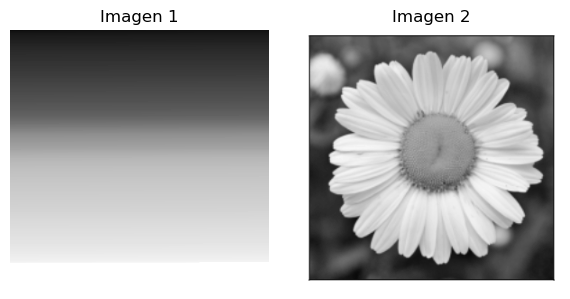

In [8]:
# Leer las imágenes en escala de grises
img1 = cv2.imread('img1_tp.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img2_tp.png', cv2.IMREAD_GRAYSCALE)

# Verificar que las imágenes se cargaron correctamente
if img1 is None or img2 is None:
    print("Error al cargar las imágenes.")
else:
    # Crear una figura para mostrar ambas imágenes juntas
    plt.figure(figsize=(6, 3))

    # Mostrar la primera imagen
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.title("Imagen 1")
    plt.axis('off')

    # Mostrar la segunda imagen
    plt.subplot(1, 2, 2) 
    plt.imshow(img2, cmap='gray') 
    plt.title("Imagen 2")
    plt.axis('off') 

    # Mostrar las imágenes
    plt.tight_layout()
    plt.show()

### B) Histogramas

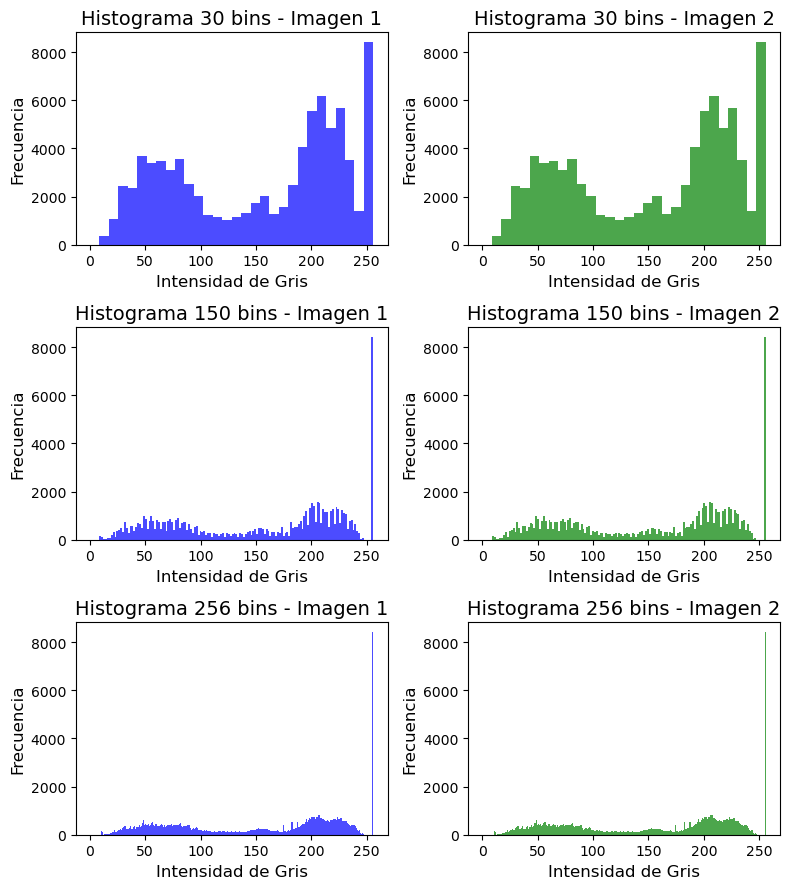

In [9]:
# Configuración de bins
bins_list = [30, 150, 256]

# Generar figura
plt.figure(figsize=(8, 9)) 

for i, bins in enumerate(bins_list):
        # Histograma para Imagen 1
        plt.subplot(3, 2, i * 2 + 1)
        plt.hist(img1.ravel(), bins=bins, range=[0, 256], color='blue', alpha=0.7)
        plt.title(f'Histograma {bins} bins - Imagen 1', fontsize=14)  
        plt.xlabel('Intensidad de Gris', fontsize=12) 
        plt.ylabel('Frecuencia', fontsize=12)

        # Histograma para Imagen 2
        plt.subplot(3, 2, i * 2 + 2)
        plt.hist(img2.ravel(), bins=bins, range=[0, 256], color='green', alpha=0.7)
        plt.title(f'Histograma {bins} bins - Imagen 2', fontsize=14)
        plt.xlabel('Intensidad de Gris', fontsize=12)
        plt.ylabel('Frecuencia', fontsize=12)

# Ajustar el diseño
plt.tight_layout()
plt.show()

Llama la atencion que, pese a tratarse de dos imagenes completamente diferentes, los histogramas impresionan ser casi identicos, lo que implica que ambas imagenes tienen valores de intensidad similares pero distribuidos de forma diferente. 

Este tipo de similitud en los histogramas podría indicar que, para un modelo de clasificación/detección de imágenes, los histogramas por sí solos no serían suficientes para diferenciar entre estas dos imágenes, ya que no capturan las características estructurales y espaciales.

### C) Segmentacion

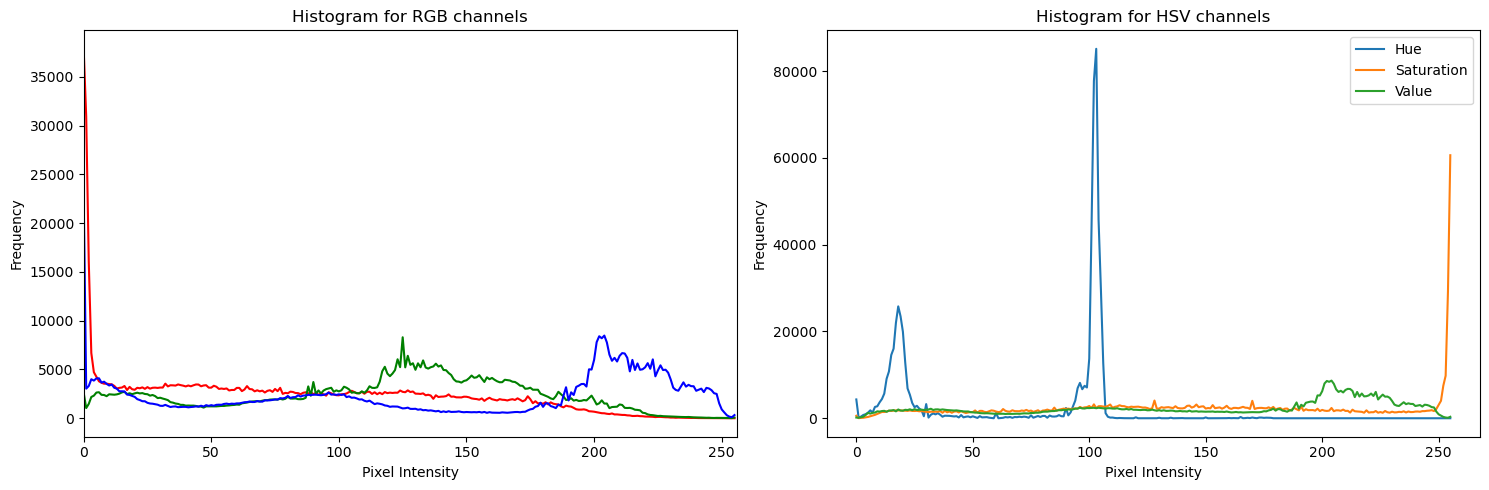

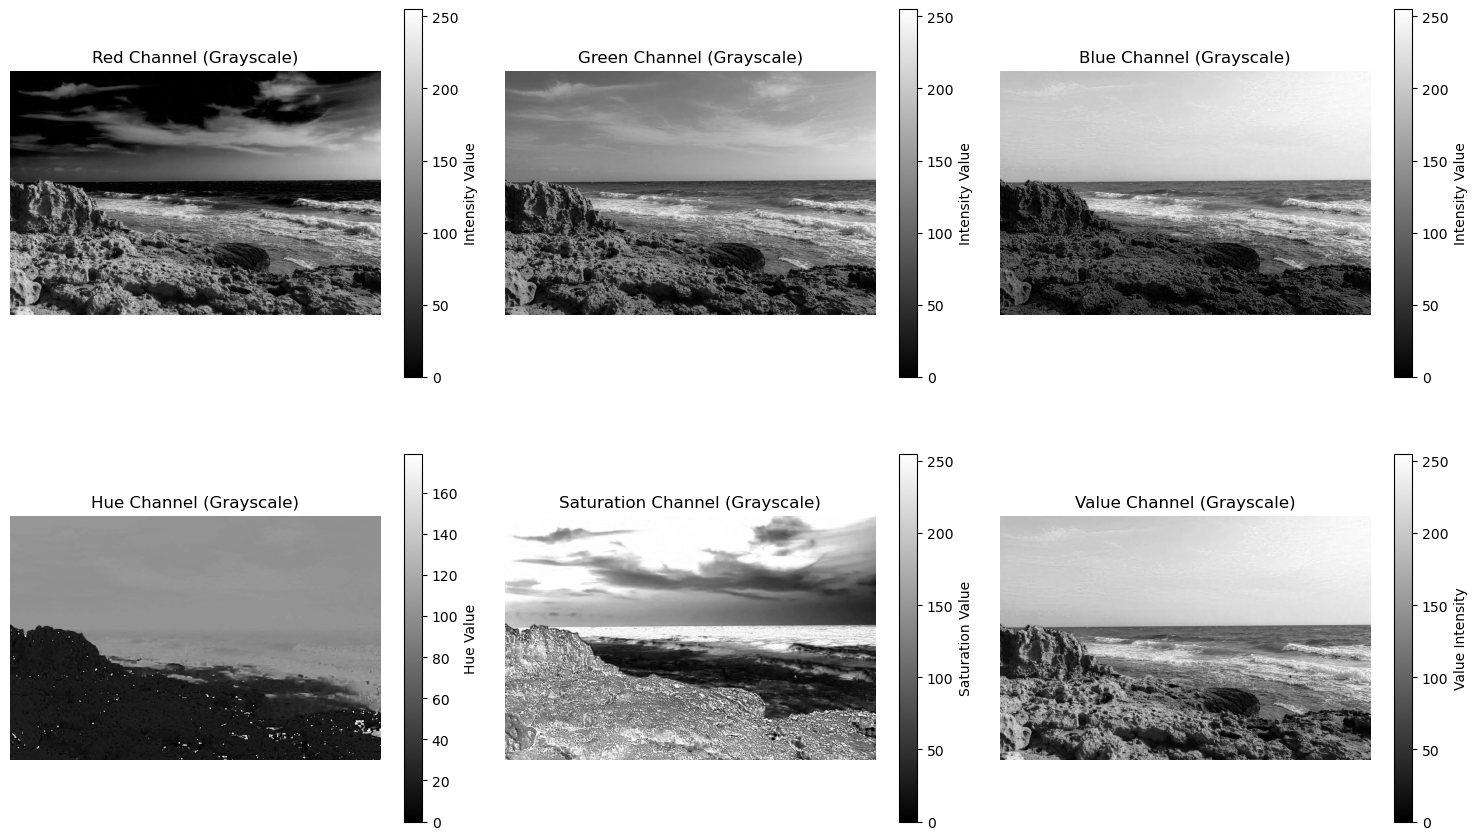

In [10]:
# Leer la imagen
image_path = 'segmentacion.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Histograma para canales RGB
colors = ('r', 'g', 'b')
plt.figure(figsize=(15, 5))

# Subplot
plt.subplot(1, 2, 1)
for i, color in enumerate(colors):
    hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.title('Histogram for RGB channels')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Convertir a HSV
hsv_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Histograma para canales HSV
plt.subplot(1, 2, 2)
hsv_titles = ['Hue', 'Saturation', 'Value']
for i in range(3):
    hist = cv2.calcHist([hsv_image], [i], None, [256], [0, 256])
    plt.plot(hist, label=hsv_titles[i])
plt.title('Histogram for HSV channels')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Graficos por canal
red_channel = image_rgb[:, :, 0]  # Canal rojo
green_channel = image_rgb[:, :, 1]  # Canal verde
blue_channel = image_rgb[:, :, 2]  # Canal azul

hue_channel = hsv_image[:, :, 0]  # Canal Hue
saturation_channel = hsv_image[:, :, 1]  # Canal Saturation
value_channel = hsv_image[:, :, 2]  # Canal Value

# Crear una figura con 6 subgráficos
plt.figure(figsize=(15, 10))

# Máscaras RGB en escala de grises
plt.subplot(2, 3, 1)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel (Grayscale)')
plt.colorbar(label='Intensity Value', shrink=0.7)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel (Grayscale)')
plt.colorbar(label='Intensity Value', shrink=0.7)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel (Grayscale)')
plt.colorbar(label='Intensity Value', shrink=0.7)
plt.axis('off')

# Máscaras HSV en escala de grises
plt.subplot(2, 3, 4)
plt.imshow(hue_channel, cmap='gray')
plt.title('Hue Channel (Grayscale)')
plt.colorbar(label='Hue Value', shrink=0.7)
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(saturation_channel, cmap='gray')
plt.title('Saturation Channel (Grayscale)')
plt.colorbar(label='Saturation Value', shrink=0.7)
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(value_channel, cmap='gray')
plt.title('Value Channel (Grayscale)')
plt.colorbar(label='Value Intensity', shrink=0.7)
plt.axis('off')

plt.tight_layout()
plt.show()


Se observa superposicion tanto en los histogramas RGB como HSV. Aun asi, del analisis conjunto pareciera que un abordaje utilizando HSV seria efectivo para separar la tierra (Utilizando valores de hue) y el cielo (utilizando valores de Value.)

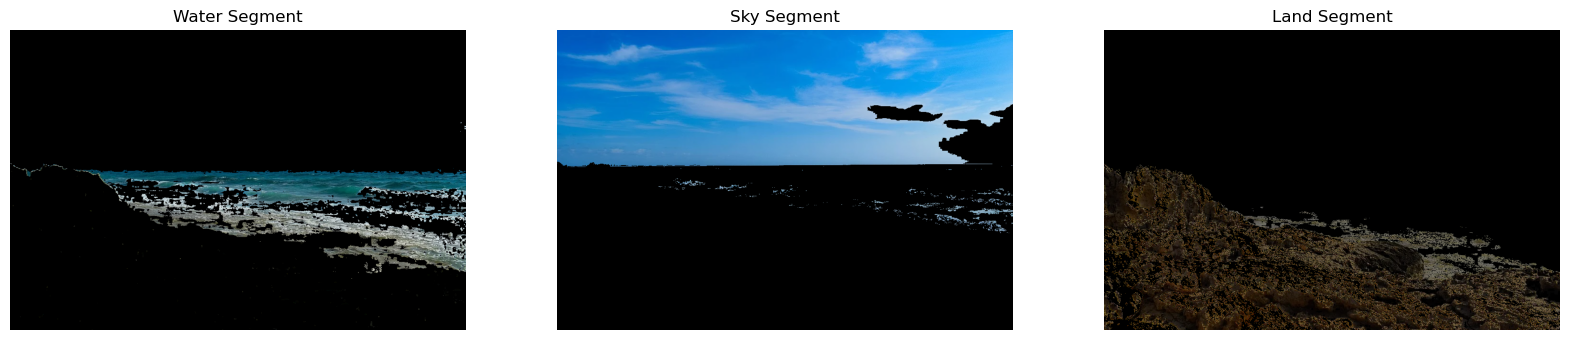

In [11]:
# Segmentacion
# Puntos de corte de segmentacion segun canal HSV
# Cierlo
lower_sky = np.array([100, 65, 170])
upper_sky = np.array([179, 255, 255])
mask_sky = cv2.inRange(hsv_image, lower_sky, upper_sky)
sky_segment = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_sky)

# Agua
lower_water = np.array([30, 0, 0])
upper_water = np.array([99, 255, 240])
mask_water = cv2.inRange(hsv_image, lower_water, upper_water)
mask_water = cv2.bitwise_and(mask_water, cv2.bitwise_not(mask_sky))  # Remove sky from water mask
water_segment = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_water)

# Tierra
lower_land = np.array([0, 0, 0])
upper_land = np.array([30, 255, 125])
mask_land = cv2.inRange(hsv_image, lower_land, upper_land)
land_segment = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_land)

# Graficar
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(water_segment)
axs[0].set_title('Water Segment')
axs[0].axis('off')

axs[1].imshow(sky_segment)
axs[1].set_title('Sky Segment')
axs[1].axis('off')

axs[2].imshow(land_segment)
axs[2].set_title('Land Segment')
axs[2].axis('off')

plt.show()

Como se puede observar, si bien utilizar los canales HUE parece haber logrado segmentar por zonas, no se pudo superar la importante superposicion presente al 100%, lo que podria requerir de metodos mas avanzados. 